In [9]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd

%matplotlib inline

In [10]:
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC $\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['Other','Cosmic','NC $\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

In [11]:
stage = 'pi0'
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/cutjustify_%s.root'%stage, treename='gamma_tree')
df = pd.DataFrame(f)
#print df.head()

dfsig = df.query('_gamma_low_matched == 1 & _gamma_high_matched == 1')
dfbkgd = df.query('_gamma_low_matched != 1 | _gamma_high_matched != 1')

df_v = [dfsig, dfbkgd]
dflabel_v = ['Signal','Background']
print df.shape[0], dfsig.shape[0], dfbkgd.shape[0]

2211 237 1974


In [12]:
def makePlots(var,var_min,var_max,nbins=20,xlabel='',cut=-1,cutlabel=''):


    fig,ax = plt.subplots(figsize=(8,6))
    plt.hist(dfbkgd[var].values,bins=nbins,label='Background',color='red',alpha=0.4,histtype='stepfilled',range=(var_min,var_max))
    plt.hist(dfsig[var].values,bins=nbins,label='Signal',color='blue',alpha=0.4,histtype='stepfilled',range=(var_min,var_max))
    plt.grid(True)
    if(cut != -1):
        plt.axvline(cut,label=cutlabel,lw=2,ls='--',c='k')
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) 
    plt.ylim(0)
    plt.savefig('Plots/CutJustify_%s%s'%(stage,var))
    

In [13]:
def make2DPlots(var1,var2,xmin,xmax,ymin,ymax,bins=40,xlabel='',ylabel=''):

    for i in xrange(0,2):
    
        H, xedges, yedges = np.histogram2d(df_v[i][var2].values,df_v[i][var1].values,bins=bins,\
                                        range=((ymin,ymax),(xmin,xmax)))
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

        fig = plt.figure(figsize=(8,6))
        if ( var1 == '_gamma_RL'):
            plt.plot((0,62),(4,0),color='fuchsia',lw=4)
        plt.pcolormesh(yedges,xedges,Hmasked)
        plt.grid(True)
        plt.colorbar()
        
        plt.xlabel(xlabel,fontsize=16,weight='bold')
        plt.ylabel(ylabel,fontsize=16,weight='bold')
        plt.title('%s'%dflabel_v[i],fontsize=16,weight='bold')
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)
        plt.savefig('Plots/CutJustify_%s%s%s_%s'%(stage,var1,var2,dflabel_v[i]))


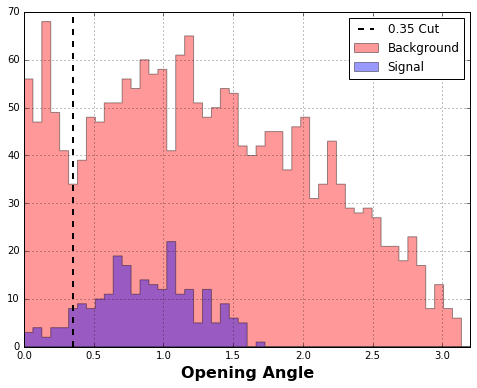

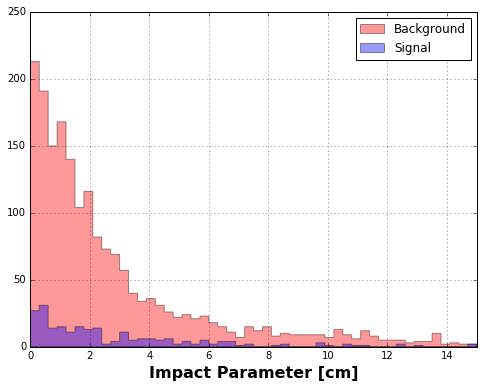

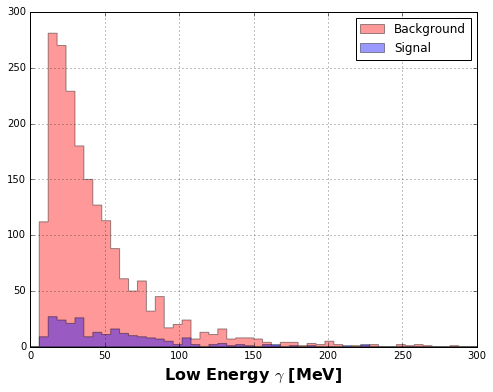

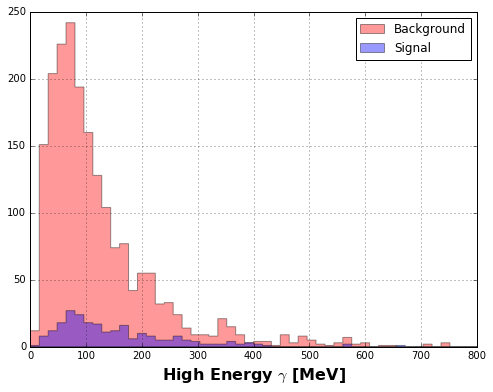

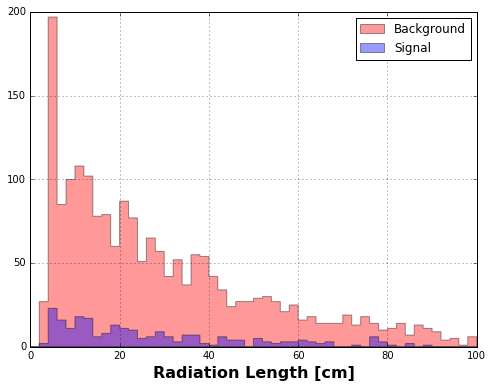

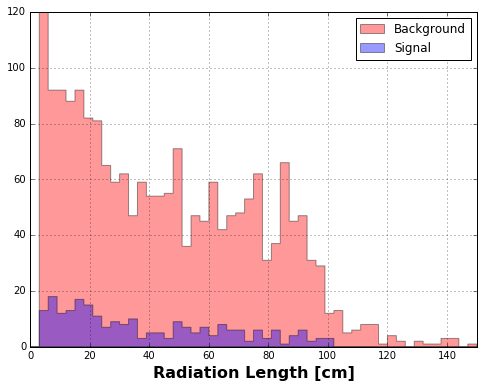

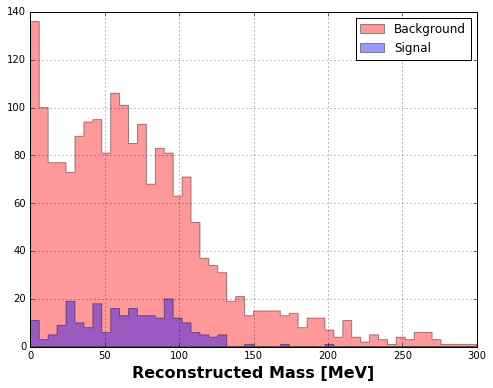

In [14]:
# Shower Plots
makePlots('_gamma_oangle',0,3.2,nbins=50,xlabel='Opening Angle',cut=0.35,cutlabel='0.35 Cut')
makePlots('_gamma_IP',0,15,nbins=50,xlabel='Impact Parameter [cm]')
makePlots('_gamma_low_E',0,300,nbins=50,xlabel='Low Energy $\\gamma$ [MeV]')
makePlots('_gamma_high_E',0,800,nbins=50,xlabel='High Energy $\\gamma$ [MeV]')
makePlots('_gamma_high_RL',0,100,nbins=50,xlabel='Radiation Length [cm]')
makePlots('_gamma_low_RL',0,150,nbins=50,xlabel='Radiation Length [cm]')
makePlots('_pi0_mass',0,300,nbins=50,xlabel='Reconstructed Mass [MeV]')

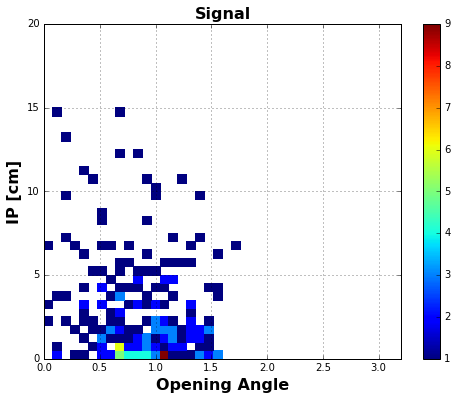

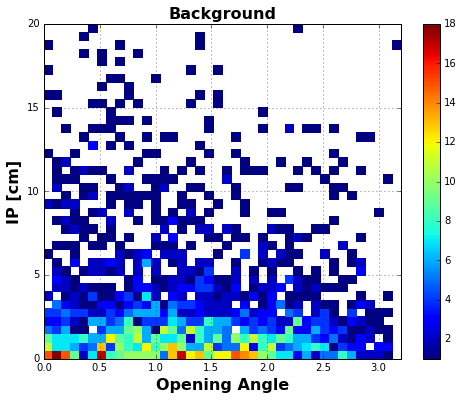

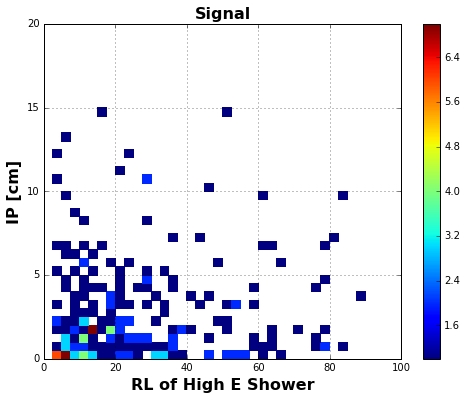

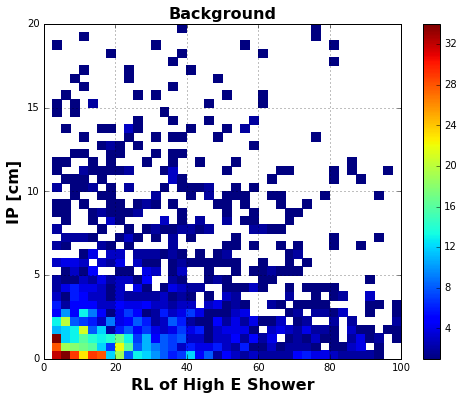

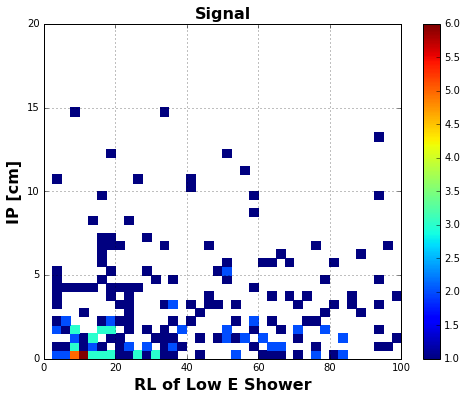

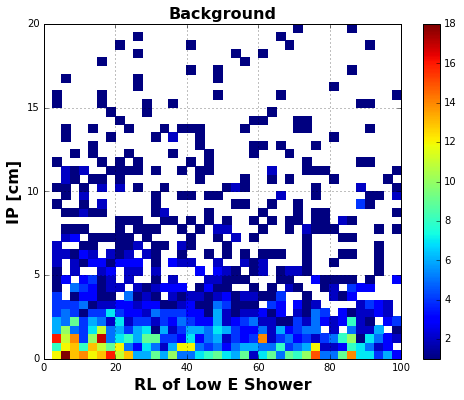

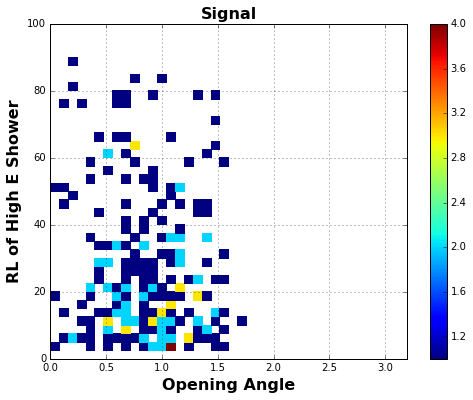

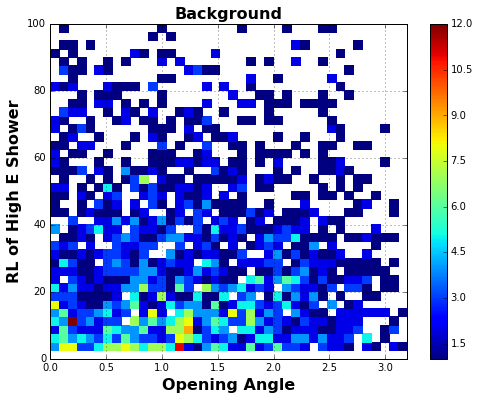

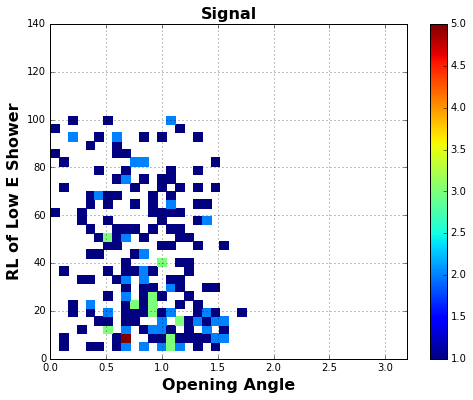

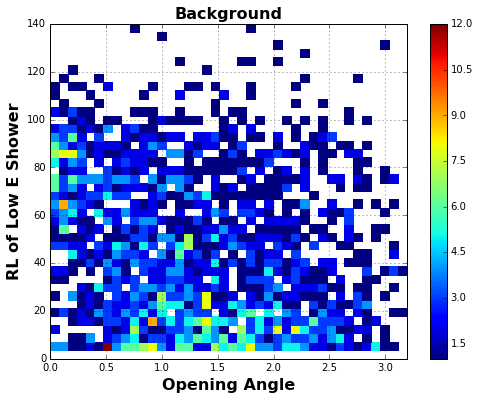

In [15]:
make2DPlots('_gamma_oangle','_gamma_IP',0,3.2,0,20,xlabel='Opening Angle',ylabel='IP [cm]')
make2DPlots('_gamma_high_RL','_gamma_IP',0,100,0,20,xlabel='RL of High E Shower',ylabel='IP [cm]')
make2DPlots('_gamma_low_RL','_gamma_IP',0,100,0,20,xlabel='RL of Low E Shower',ylabel='IP [cm]')
make2DPlots('_gamma_oangle','_gamma_high_RL',0,3.2,0,100,xlabel='Opening Angle',ylabel='RL of High E Shower')
make2DPlots('_gamma_oangle','_gamma_low_RL',0,3.2,0,140,xlabel='Opening Angle',ylabel='RL of Low E Shower')


In [16]:
def makeEffPlots(var,var_min,var_max,nbins=20,xlabel='',cut=-1,cutlabel='',fwrd=True):

    fig,ax = plt.subplots(figsize=(8,6))
    bkgd0, bins_b, _ = plt.hist(dfbkgd[var].values,bins=nbins,label='Background',color='red',alpha=0.4,histtype='stepfilled',range=(var_min,var_max))
    sig0, bins_s, _ = plt.hist(dfsig[var].values,bins=nbins,label='Signal',color='blue',alpha=0.4,histtype='stepfilled',range=(var_min,var_max))
    plt.grid(True)
    if(cut != -1):
        plt.axvline(cut,label=cutlabel,lw=2,ls='--',c='k')
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) 
   
    s_tot = np.cumsum(sig0)[-1]
    b_tot = np.cumsum(bkgd0)[-1]
    
    eff = [];  pur = []
    if fwrd :
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ]
        pur = [ float(np.cumsum(sig0[i:])[-1])/(np.cumsum(sig0[i:])[-1] + np.cumsum(bkgd0[i:])[-1]) for i in xrange(len(bkgd0)) ]        
    else:
        eff = [ float(np.cumsum(sig0[:i+1])[-1])/s_tot for i in xrange(len(sig0)) ]
        pur = [ float(np.cumsum(sig0[:i+1])[-1])/(np.cumsum(sig0[:i+1])[-1] + np.cumsum(bkgd0[:i+1])[-1]) for i in xrange(len(bkgd0)) ]        
    
    mult = [ eff[i] * pur[i] for i in xrange(len(eff)) ]
    
    bin_size = float(var_max - var_min)/nbins
    bins_ss = [i+bin_size/2 for i in bins_s]
   
    ax2 = plt.twinx()
    plt.plot(bins_ss[:-1],eff,'k-',label="Eff",marker='o')   
    plt.plot(bins_ss[:-1],pur,'g-',label="Purity",marker='o')       
    plt.plot(bins_ss[:-1],mult,'b-',label="Eff * Pur",marker='o')      
    ax2.set_ylabel('Efficiency', color='k',fontsize=16,weight='bold')
    plt.legend(loc='upper left',bbox_to_anchor=(0.75,.8))

    plt.xlim(var_min,var_max)
    
    plt.savefig('Plots/CutJustify_%s_eff%s'%(stage,var))

    

/Library/Python/2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
/Library/Python/2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


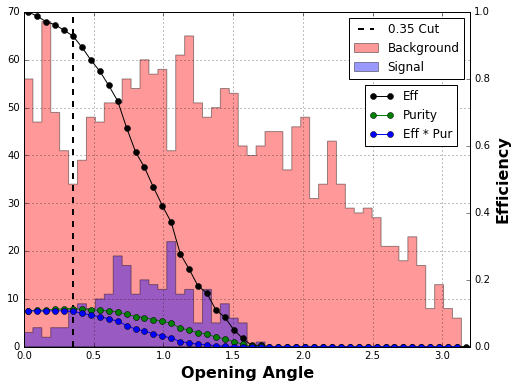

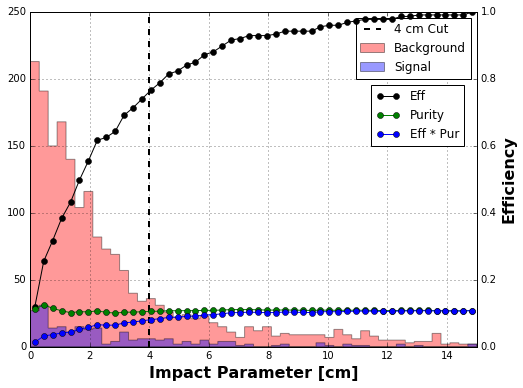

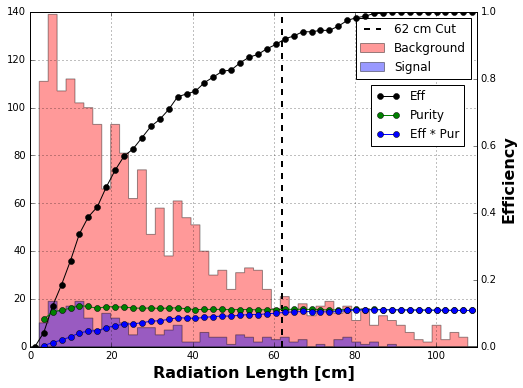

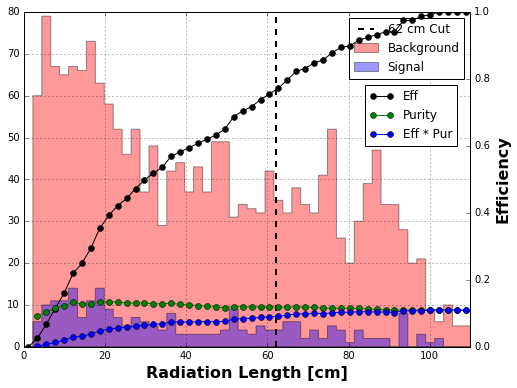

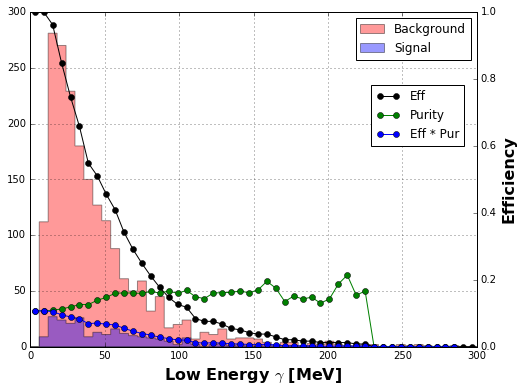

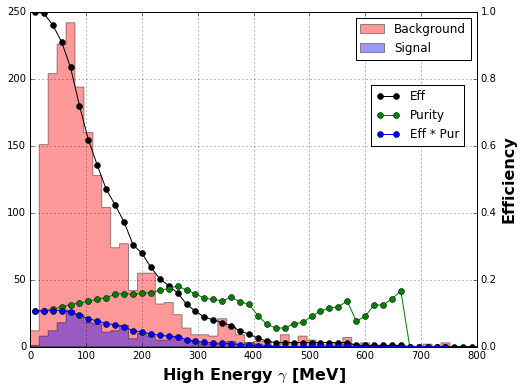

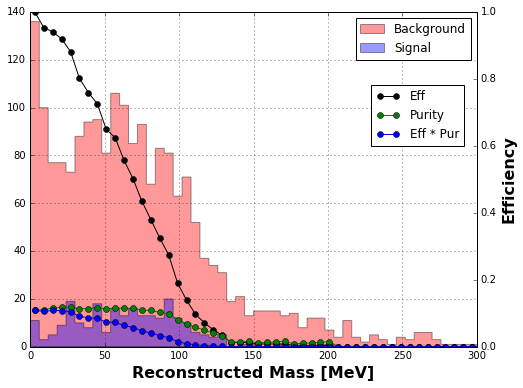

In [18]:
makeEffPlots('_gamma_oangle',0,3.2,nbins=50,xlabel='Opening Angle',cut=0.35,cutlabel='0.35 Cut')
makeEffPlots('_gamma_IP',0,15,nbins=50,xlabel='Impact Parameter [cm]',cut=4,cutlabel='4 cm Cut',fwrd=False)

makeEffPlots('_gamma_high_RL',0,110,nbins=50,xlabel='Radiation Length [cm]',cut=62,cutlabel='62 cm Cut',fwrd=False)
makeEffPlots('_gamma_low_RL',0,110,nbins=50,xlabel='Radiation Length [cm]',cut=62,cutlabel='62 cm Cut',fwrd=False)

makeEffPlots('_gamma_low_E',0,300,nbins=50,xlabel='Low Energy $\\gamma$ [MeV]')
makeEffPlots('_gamma_high_E',0,800,nbins=50,xlabel='High Energy $\\gamma$ [MeV]')
makeEffPlots('_pi0_mass',0,300,nbins=50,xlabel='Reconstructed Mass [MeV]')



In [19]:
# Compare 1 shrs cut
stage = 'pi0'
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/cutjustify_%s.root'%stage,\
                  treename='one_gamma_tree')
df = pd.DataFrame(f)

dfsig = df.query('_gamma_matched == 1 ')
dfbkgd = df.query('_gamma_matched != 1 ')

df_v = [dfsig, dfbkgd]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


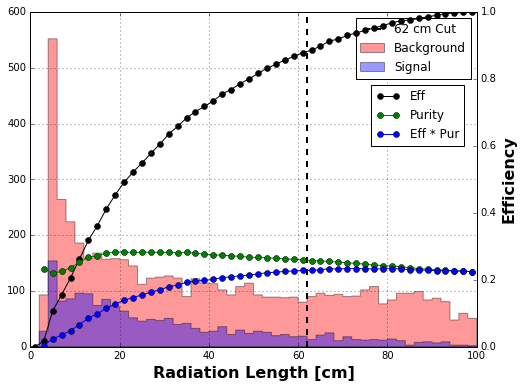

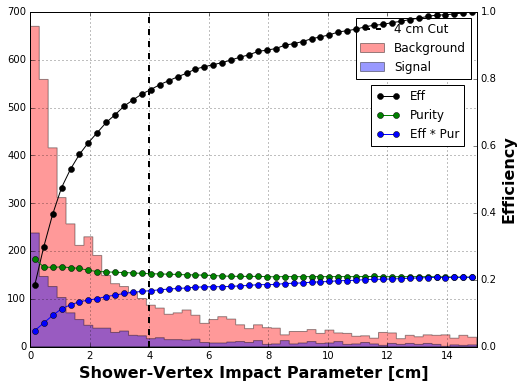

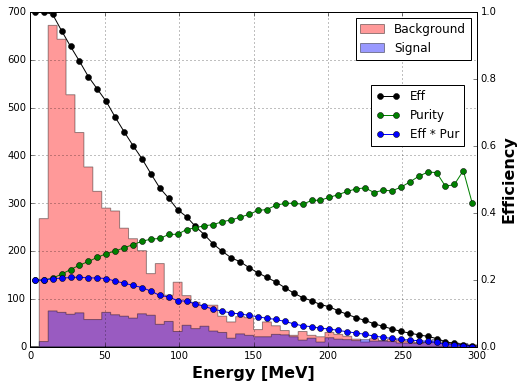

In [20]:
stage = 'pi0_1shower'

makeEffPlots('_gamma_RL',0,100,nbins=50,xlabel='Radiation Length [cm]',cut=62,cutlabel='62 cm Cut',fwrd=False)
makeEffPlots('_gamma_vtx_IP',0,15,nbins=50,xlabel='Shower-Vertex Impact Parameter [cm]',cut=4,cutlabel='4 cm Cut',fwrd=False)
makeEffPlots('_gamma_E',0,300,nbins=50,xlabel='Energy [MeV]')


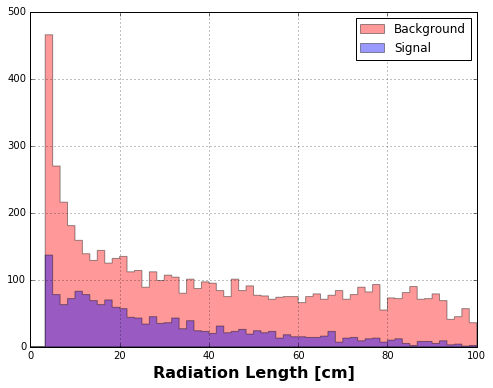

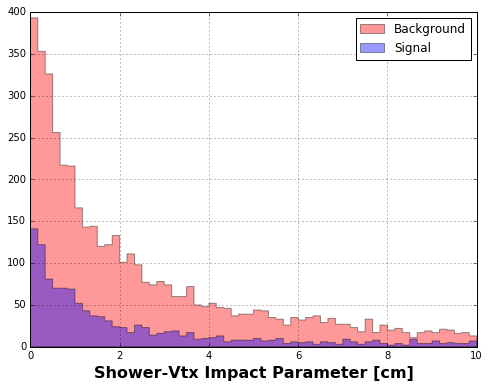

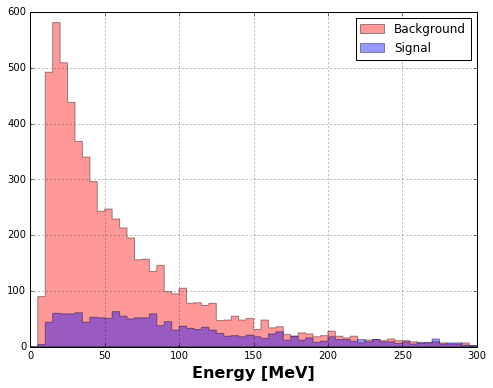

In [21]:
# Shower Plots
stage = 'pi0_1shower'

makePlots('_gamma_RL',0,100,nbins=60,xlabel='Radiation Length [cm]')
makePlots('_gamma_vtx_IP',0,10,nbins=60,xlabel='Shower-Vtx Impact Parameter [cm]')
makePlots('_gamma_E',0,300,nbins=60,xlabel='Energy [MeV]')

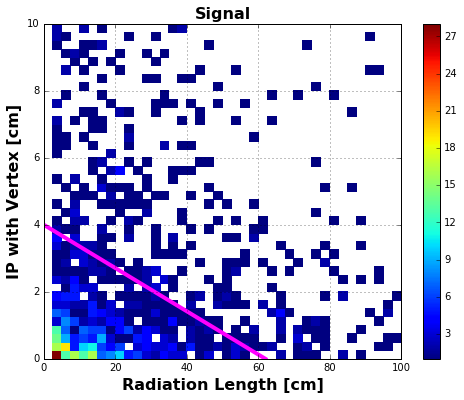

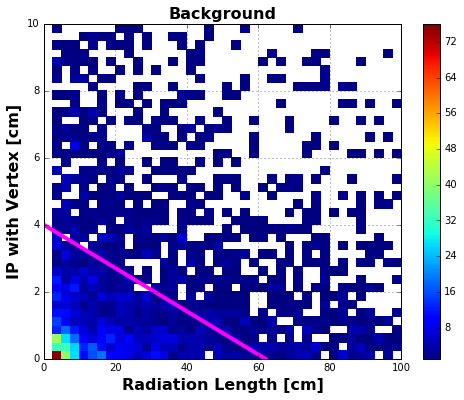

In [208]:
stage = 'pi0_1shower'
make2DPlots('_gamma_RL','_gamma_vtx_IP',0,100,0,10,xlabel='Radiation Length [cm]',ylabel='IP with Vertex [cm]')


In [42]:
def make2DEffPlots(var1,var2,xmin,xmax,ymin,ymax,bins=40,xlabel='',ylabel=''):

    for i in xrange(0,2):
    
        H, xedges, yedges = np.histogram2d(df_v[i][var2].values,df_v[i][var1].values,bins=bins,\
                                        range=((ymin,ymax),(xmin,xmax)))
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

        print len(xedges)
        
        
        for j in xrange(1,8):
            h, x, y = np.histogram2d([0 for i in xrange(40)],[0 for i in xrange(40)],bins=40)

            for x in xrange(len(xedges) - 1):
                for y in xrange(len(yedges) - 1):
                #if Hmasked[y][x] != 0:
                    print xedges[x], yedges[y], Hmasked[y][x]      
            
#         fig = plt.figure(figsize=(8,6))
#         ,plt.pcolormesh(yedges,xedges,Hmasked)
#         plt.grid(True)
#         plt.colorbar()
        
#         plt.xlabel(xlabel,fontsize=16,weight='bold')
#         plt.ylabel(ylabel,fontsize=16,weight='bold')
#         plt.title('%s'%dflabel_v[i],fontsize=16,weight='bold')
#         plt.xlim(xmin,xmax)
#         plt.ylim(ymin,ymax)
#         plt.savefig('Plots/CutJustify_%s%s%s_%s'%(stage,var1,var2,dflabel_v[i]))


In [23]:
# Compare n shrs cut
stage = 'pi0'
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/backgrounds_ratio.root ', treename='tree')
df = pd.DataFrame(f)

dfshrs = df.query('nshrs > 0')
print df.shape, dfshrs.shape

(5643, 26) (3147, 26)


In [24]:
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

print '\nSignals: ', cc1pi0_v.shape[0]
print 'Background breakdown: '
print 'Cosmic: ', cos_v.shape[0]
print 'CC 0pi0: ', cc0pi0_v.shape[0]
print 'NC pi0: ', nc1pi0_v.shape[0]
print 'NC 0pi0: ', nc0pi0_v.shape[0]
print 'Other : ', oth_v.shape[0]


colors_v = ['purple','yellow','lime','green','lightskyblue','salmon'] 


Signals:  1355
Background breakdown: 
Cosmic:  630
CC 0pi0:  2504
NC pi0:  463
NC 0pi0:  453
Other :  238


In [17]:
# Compare n shrs cut
stage = 'pi0'
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/cutjustify_%s.root'%stage, treename='tree')
df = pd.DataFrame(f)

dfshrs = df.query('nshrs > 0')
print df.shape, dfshrs.shape

(5643, 13) (3147, 13)


In [18]:
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

print '\nSignals: ', cc1pi0_v.shape[0]
print 'Background breakdown: '
print 'Cosmic: ', cos_v.shape[0]
print 'CC 0pi0: ', cc0pi0_v.shape[0]
print 'NC pi0: ', nc1pi0_v.shape[0]
print 'NC 0pi0: ', nc0pi0_v.shape[0]
print 'Other : ', oth_v.shape[0]


colors_v = ['purple','yellow','lime','green','lightskyblue','salmon'] 


Signals:  1362
Background breakdown: 
Cosmic:  740
CC 0pi0:  2428
NC pi0:  396
NC 0pi0:  451
Other :  266


In [25]:
dftable = df.query('nshrs > 1')
a = dftable.query('bkgd_id == 1')
b = dftable.query('bkgd_id == 2')
c = dftable.query('bkgd_id == 3')
d = dftable.query('bkgd_id == 4')
e = dftable.query('bkgd_id == 5')
f = dftable.query('bkgd_id == 6')

print 'After ratio cut, start with :', df.shape[0]
print 'After 2 shower requirement  :', dftable.shape[0]
print '\nSignals: ', b.shape[0]
print 'CC 0pi0: ', c.shape[0]
print 'NC pi0: ', d.shape[0]
print 'NC 0pi0: ', e.shape[0]
print 'Other : ', f.shape[0]
print 'Cosmic: ', a.shape[0]

dftable = df.query('nshrs > 0')
a = dftable.query('bkgd_id == 1')
b = dftable.query('bkgd_id == 2')
c = dftable.query('bkgd_id == 3')
d = dftable.query('bkgd_id == 4')
e = dftable.query('bkgd_id == 5')
f = dftable.query('bkgd_id == 6')

print 'After ratio cut, start with :', df.shape[0]
print 'After 1 shower requirement  :', dftable.shape[0]
print '\nSignals: ', b.shape[0]
print 'CC 0pi0: ', c.shape[0]
print 'NC pi0: ', d.shape[0]
print 'NC 0pi0: ', e.shape[0]
print 'Other : ', f.shape[0]
print 'Cosmic: ', a.shape[0]


After ratio cut, start with : 5643
After 2 shower requirement  : 1117

Signals:  532
CC 0pi0:  147
NC pi0:  174
NC 0pi0:  26
Other :  131
Cosmic:  107
After ratio cut, start with : 5643
After 2 shower requirement  : 3147

Signals:  1205
CC 0pi0:  850
NC pi0:  396
NC 0pi0:  136
Other :  213
Cosmic:  347


In [34]:
def makeStackedPlots(var,xmin,xmax,nbins=20,xlabel=''):
    
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]
    
    plt.figure()
    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values,cc1pi0_v[var].values],bins=nbins,label=label_v,color=colors_v,stacked=True,\
         range=(xmin,xmax),rwidth=bin_width,histtype='stepfilled')
    handles,labels = ax.get_legend_handles_labels()
    plt.legend() #handles=handles[::-1],fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
    
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.xlim(xmin,xmax)
    #plt.ylim(0,2700)
    plt.savefig('Plots/CutJustify_%s_stacked_%s.png'%(stage,var))
    plt.yscale('log')
    plt.savefig('Plots/CutJustify_%s_stacked_%s_log.png'%(stage,var))


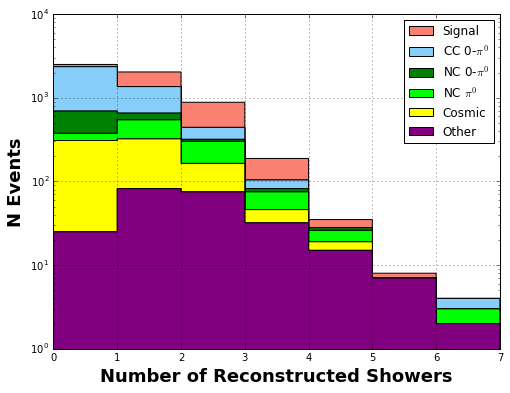

In [35]:
makeStackedPlots('nshrs',0,7,nbins=7,xlabel='Number of Reconstructed Showers')

In [82]:

f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_ratiocut_ana.root', treename='low_level_tree')
df = pd.DataFrame(f)

temp = df.query('nshrs > 1')
print temp.shape, df.shape

(1117, 23) (5643, 23)


In [11]:
f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/cutjustify_pi0.root', treename='pi0_selection')
df2 = pd.DataFrame(f2)

#df2.info()
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC 1-$\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['All','Cosmic','CC1pi0','CC0pi0','NC1pi0','NC0pi0','Other']

In [131]:
stage = 'pi0'
print df2.shape

(1802, 10)


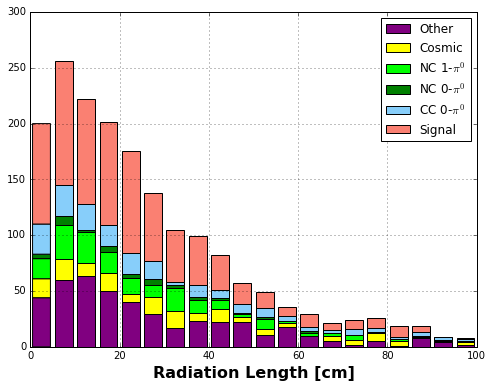

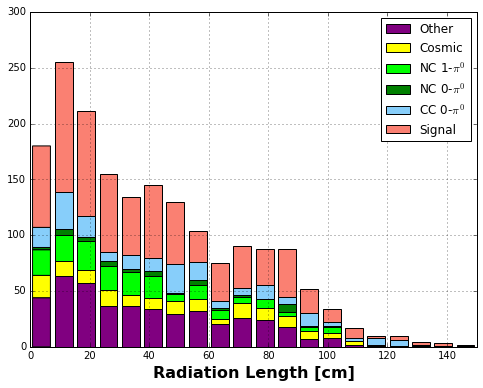

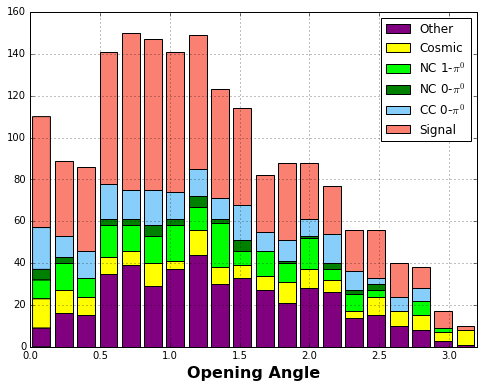

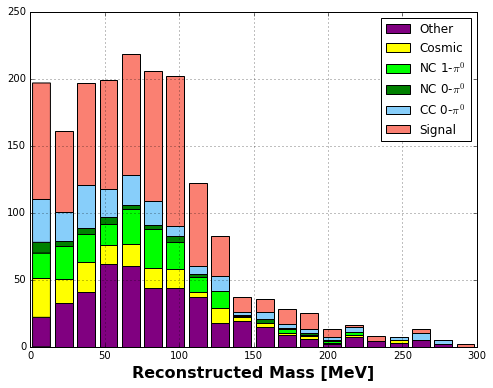

In [134]:
# Shower Plots
makePlots('_pi0_high_radL',0,100,xlabel='Radiation Length [cm]')
makePlots('_pi0_low_radL',0,150,xlabel='Radiation Length [cm]')
makePlots('_pi0_oangle',0,3.2,xlabel='Opening Angle')
makePlots('_pi0_mass',0,300,xlabel='Reconstructed Mass [MeV]')


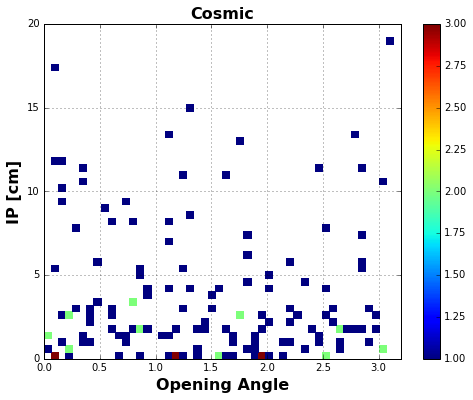

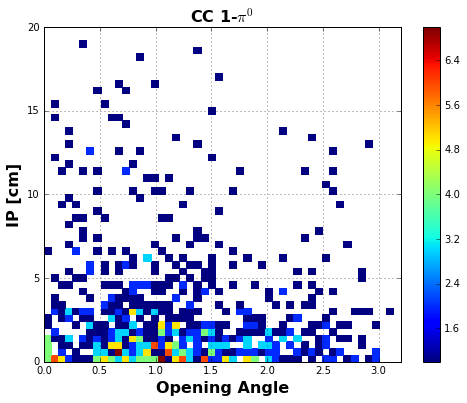

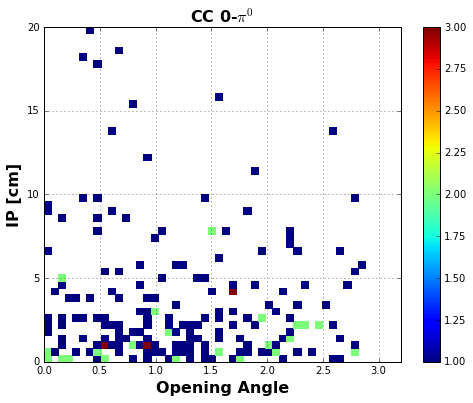

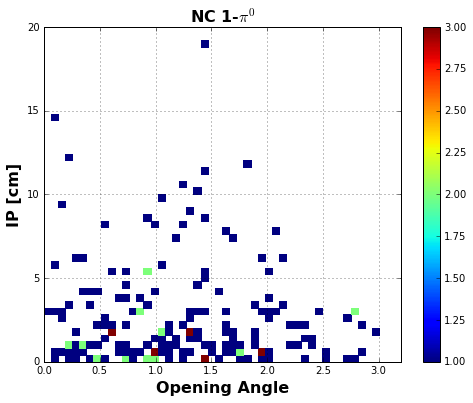

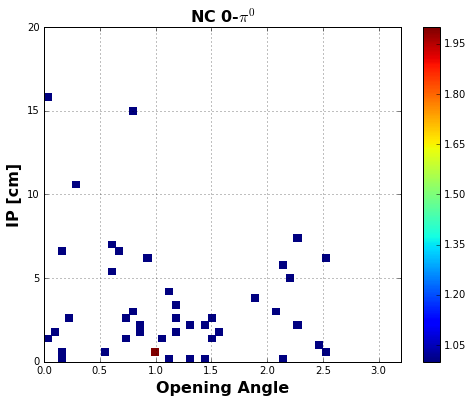

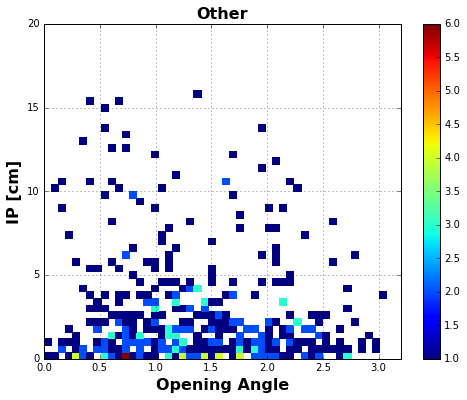

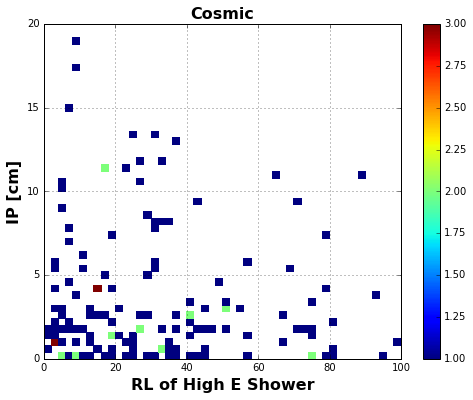

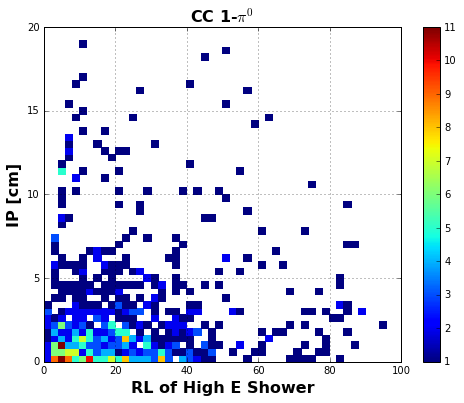

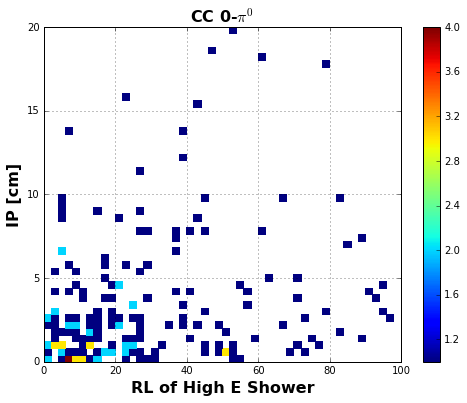

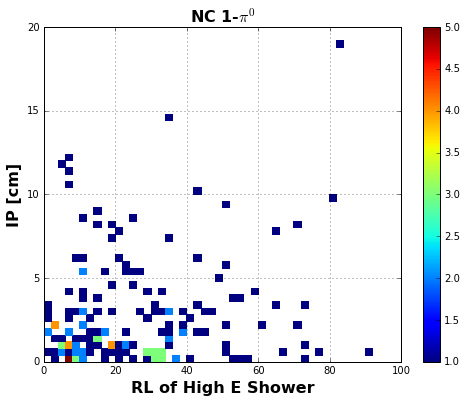

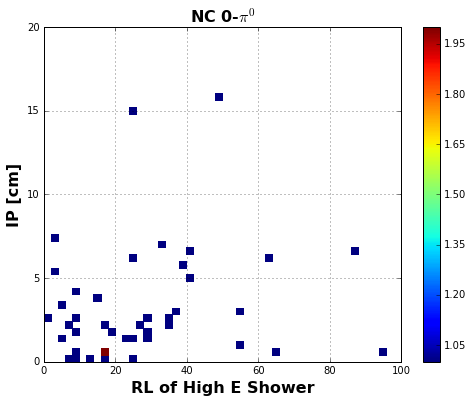

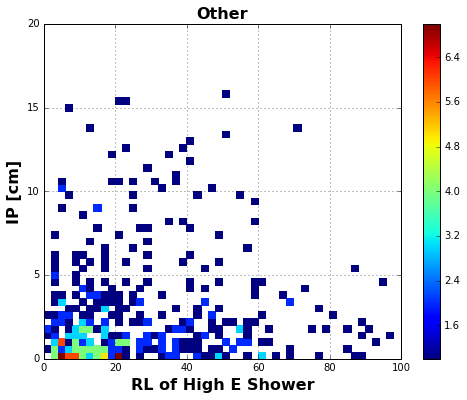

In [136]:
make2DPlots('_pi0_oangle','_pi0_IP',0,3.2,0,20,xlabel='Opening Angle',ylabel='IP [cm]')
make2DPlots('_pi0_high_radL','_pi0_IP',0,100,0,20,xlabel='RL of High E Shower',ylabel='IP [cm]')


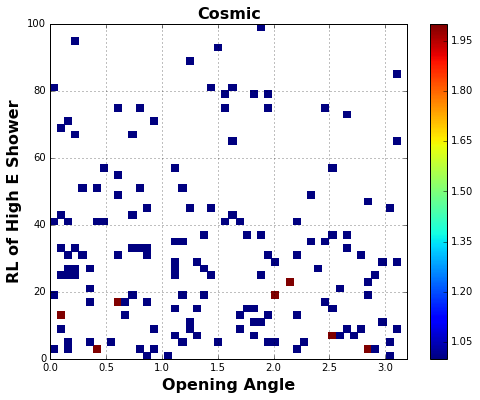

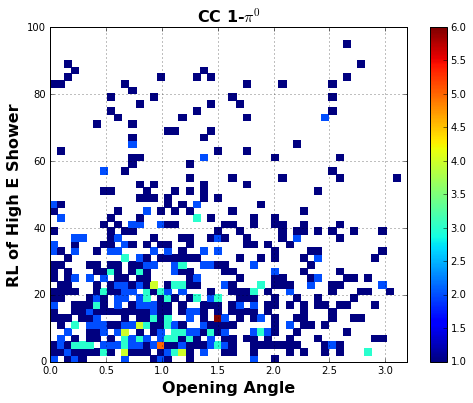

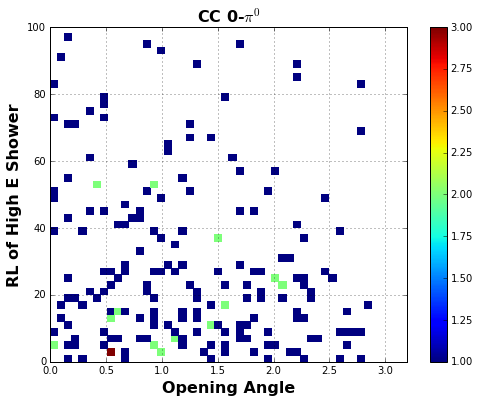

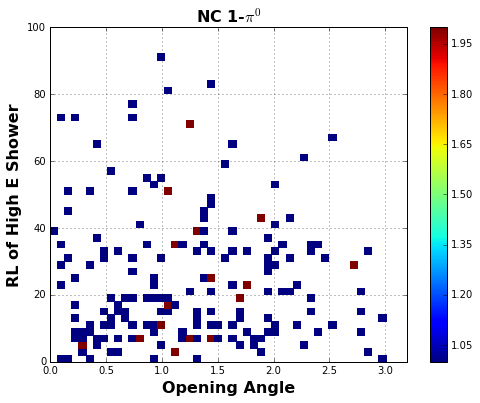

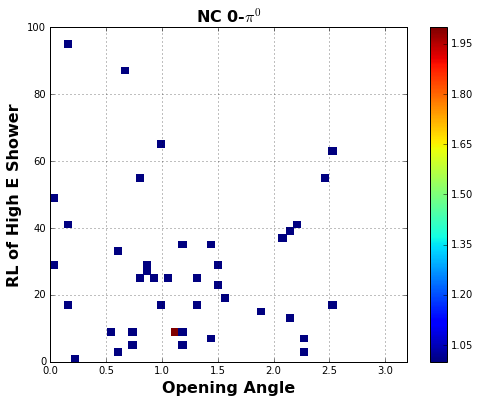

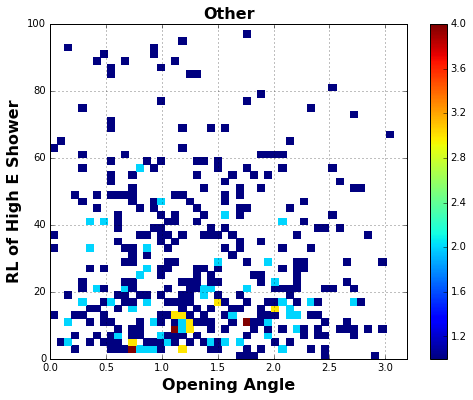

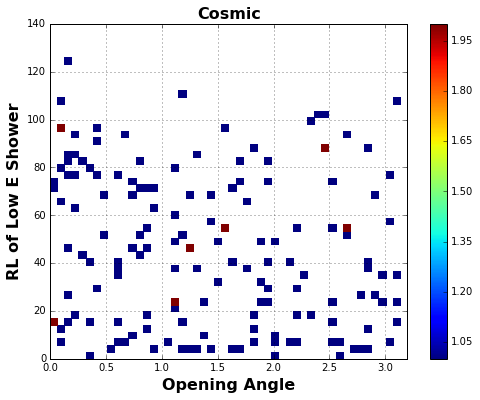

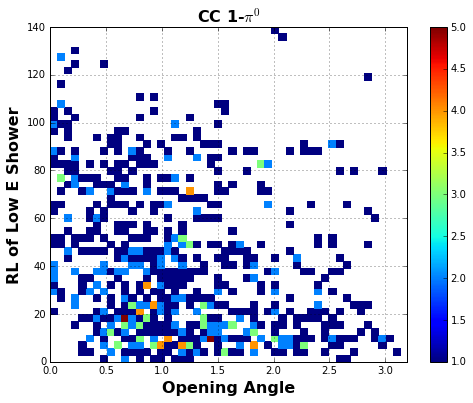

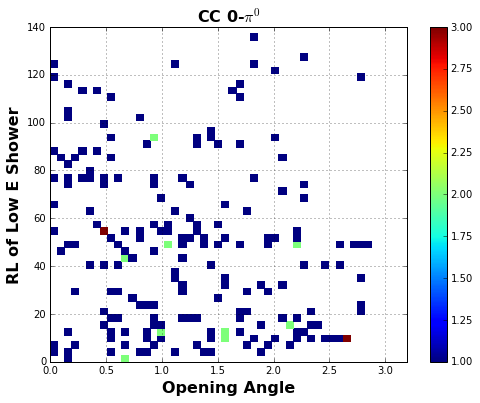

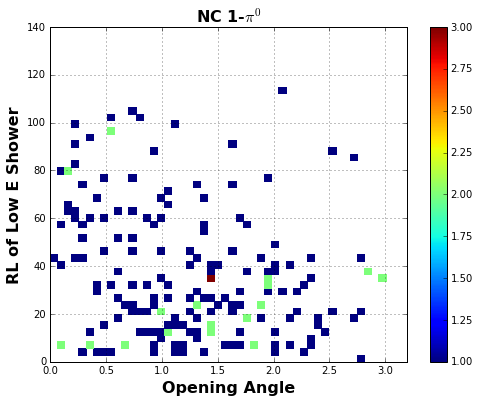

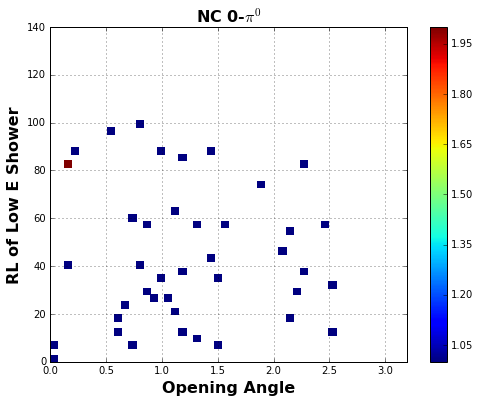

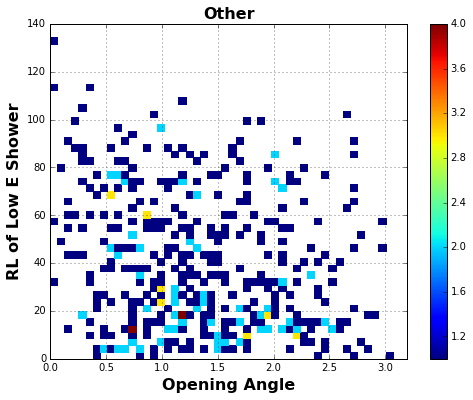

In [137]:
make2DPlots('_pi0_oangle','_pi0_high_radL',0,3.2,0,100,xlabel='Opening Angle',ylabel='RL of High E Shower')
make2DPlots('_pi0_oangle','_pi0_low_radL',0,3.2,0,140,xlabel='Opening Angle',ylabel='RL of Low E Shower')


In [155]:
def makeNonStackedPlots(var,var_min,var_max,nbins=40,xlabel=''):
    
    lw = 2

    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist(oth_v[var].values,bins=nbins,label='Other',color=colors_tst[0],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(cos_v[var].values,bins=nbins,label='Cosmic',color=colors_tst[1],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(nc1pi0_v[var].values,bins=nbins,label='NC1pi0',color=colors_tst[2],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(nc0pi0_v[var].values,bins=nbins,label='NC0pi0',color=colors_tst[3],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(cc0pi0_v[var].values,bins=nbins,label='CC0pi0',color='blue',histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(cc1pi0_v[var].values,bins=nbins,label='CC1pi0',color=colors_tst[5],histtype='step',lw=lw,range=(var_min,var_max))
    plt.grid(True)
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/CutJustify_%s_nonstacked%s'%(stage,var))
    

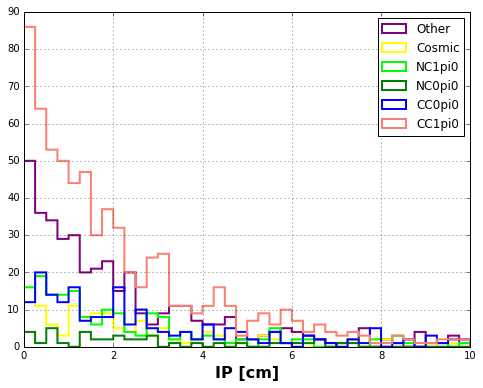

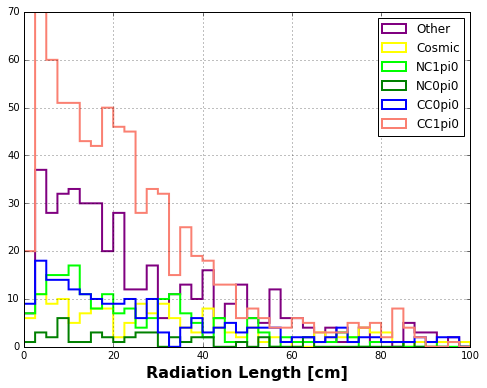

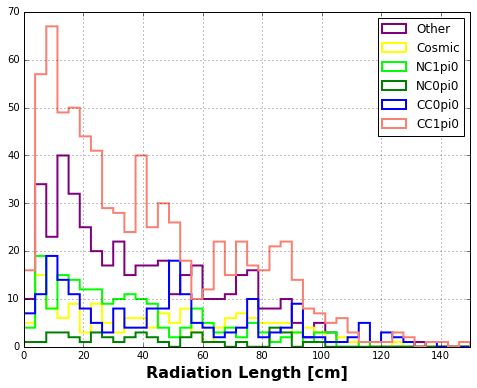

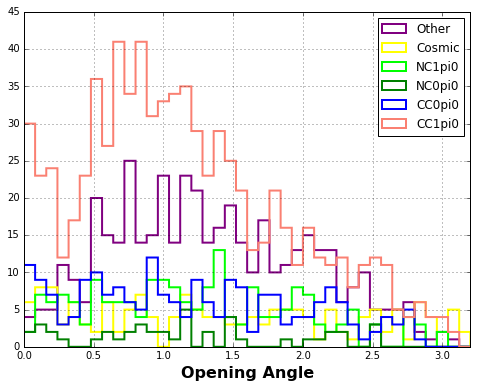

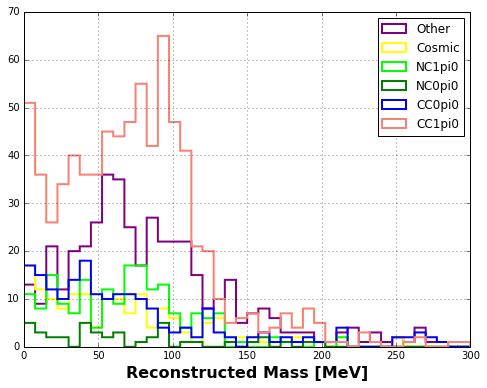

In [158]:
# Shower Plots
makeNonStackedPlots('_pi0_IP',0,10,xlabel='IP [cm]')
makeNonStackedPlots('_pi0_high_radL',0,100,xlabel='Radiation Length [cm]')
makeNonStackedPlots('_pi0_low_radL',0,150,xlabel='Radiation Length [cm]')
makeNonStackedPlots('_pi0_oangle',0,3.2,xlabel='Opening Angle')
makeNonStackedPlots('_pi0_mass',0,300,xlabel='Reconstructed Mass [MeV]')


In [19]:
5643 - 1117


4526

In [20]:
4526./5643

0.8020556441609074